# Thư viện cần thiết

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import Image
from sklearn.metrics import classification_report, confusion_matrix

# Palmer Penguins dataset

### 1. Train và test dataset

In [13]:
# Fetch Palmer Penguins dataset using seaborn
penguins = sns.load_dataset('penguins')

# Handle missing values
data = penguins.dropna().reset_index(drop=True)

# Encode categorical feature 'sex'
label_encoder_sex = LabelEncoder()
data['sex'] = label_encoder_sex.fit_transform(data['sex'])

# Define features (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex)
feature_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
features = data[feature_columns].values

# Define labels (species)
raw_labels = np.ravel(data['species'])

# Encode the target variable
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(raw_labels)

# Define class names
class_names = ['Adelie', 'Chinstrap', 'Gentoo']

# Define train/test split proportions
split_ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]

# Container for storing training and test datasets
subsets = []

for split_ratio in split_ratios:
    feature_train, feature_test, label_train, label_test = train_test_split(
        features, labels_encoded, test_size=split_ratio[1], random_state=42, stratify=labels_encoded
    )
    
    subsets.append({
        'feature_train': feature_train,
        'label_train': label_train,
        'feature_test': feature_test,
        'label_test': label_test
    })

### 2. Visualization

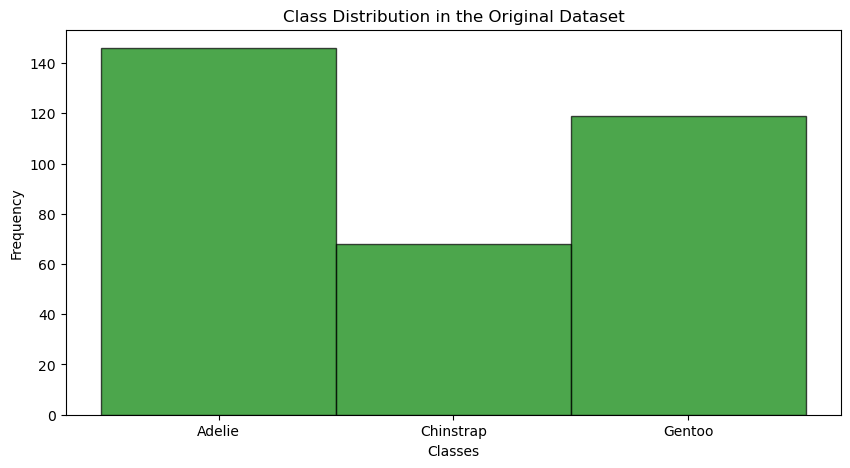

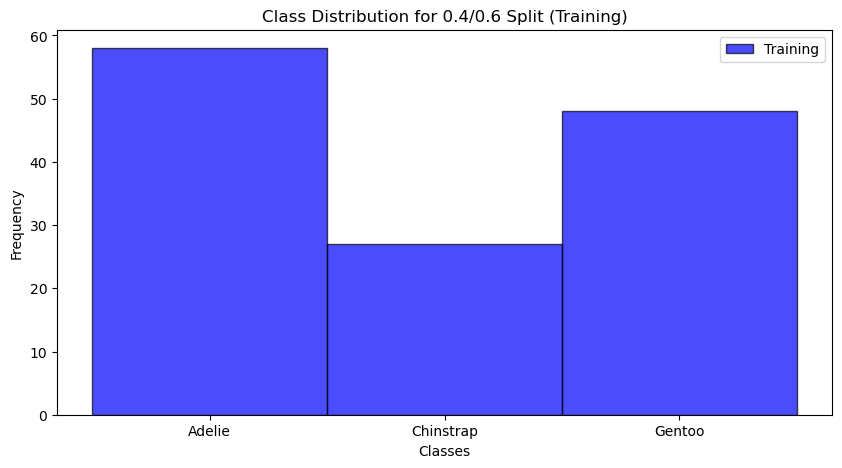

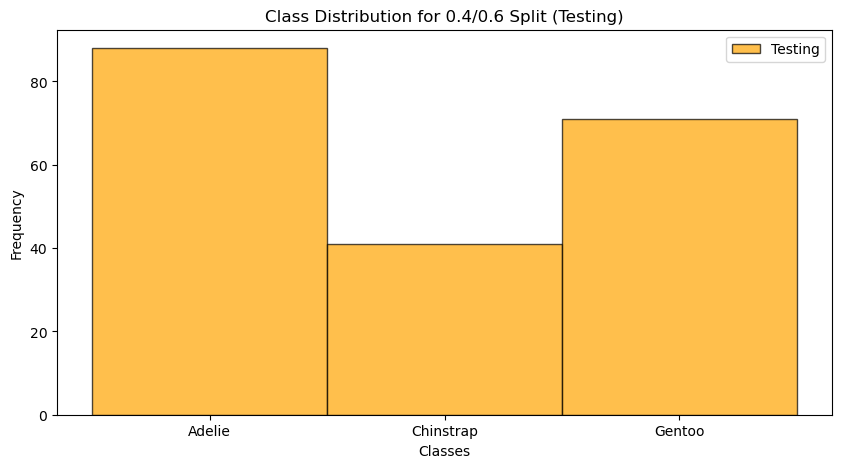

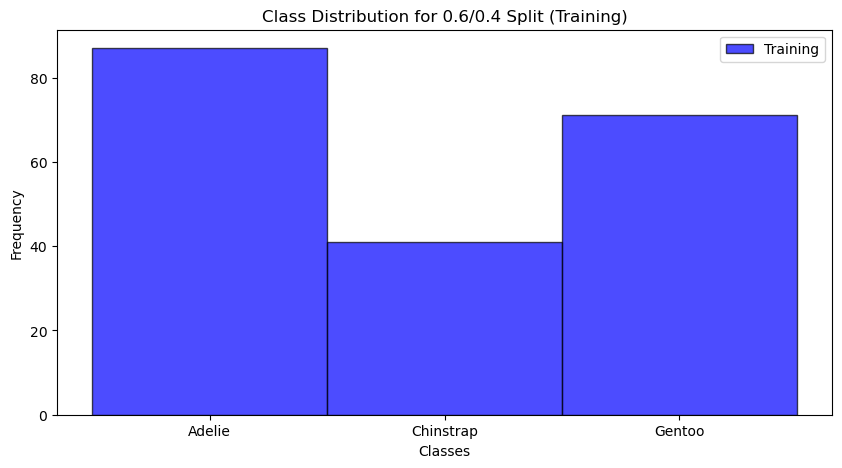

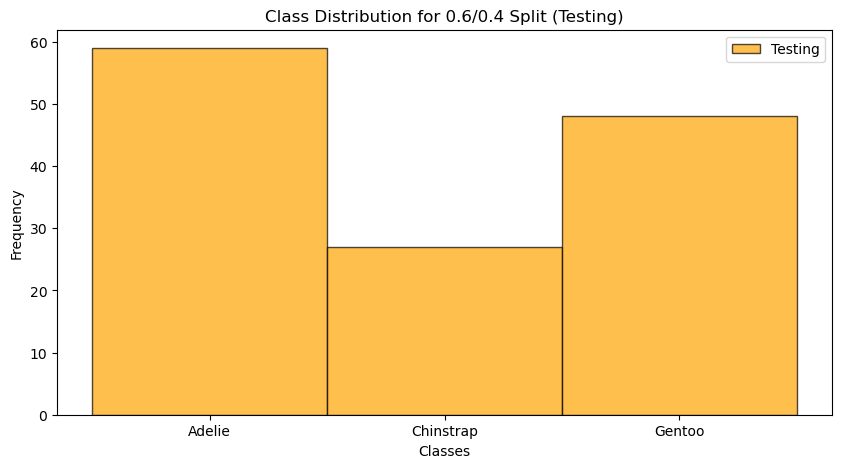

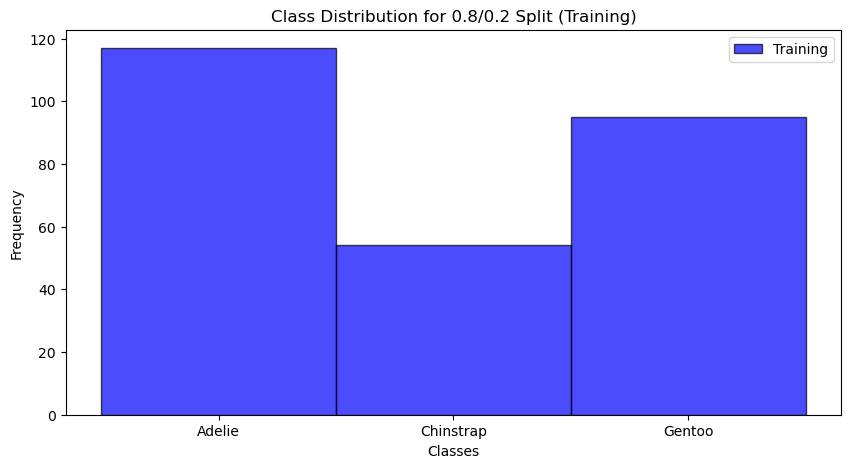

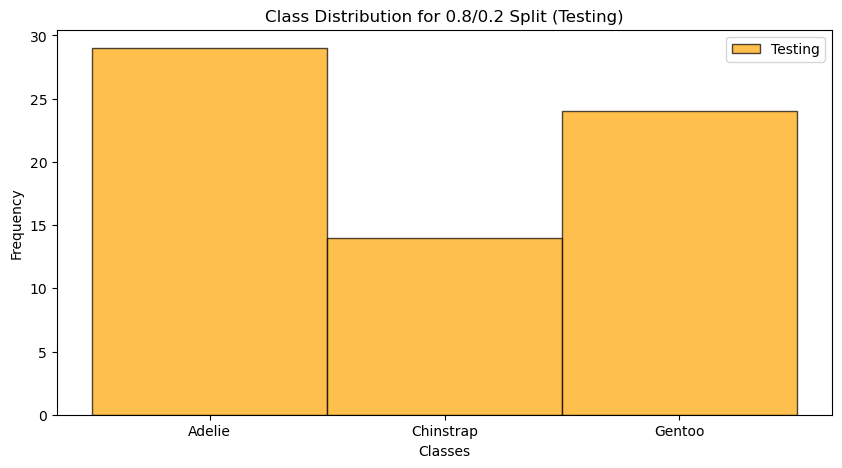

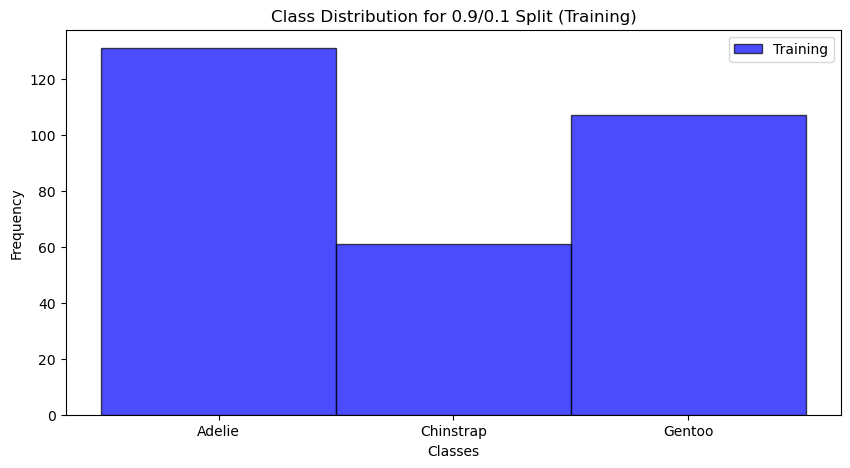

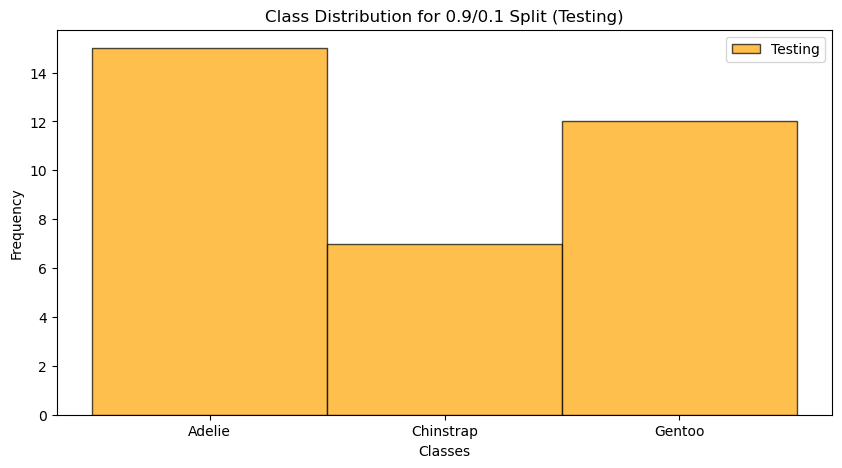

In [14]:
# Visualize the class distribution in the original dataset
plt.figure(figsize=(10, 5))
bins = np.arange(len(np.unique(labels_encoded)) + 1) - 0.5  # Center bins for discrete labels
plt.hist(labels_encoded, bins=bins, color="green", alpha=0.7, edgecolor="black")
plt.title("Class Distribution in the Original Dataset")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks(np.arange(len(class_names)), class_names)
plt.show()

# Visualize distributions for each train/test split
for i in range(len(subsets)):
    label_train = subsets[i]['label_train']
    label_test = subsets[i]['label_test']

    bins = np.arange(len(np.unique(labels_encoded)) + 1) - 0.5  # Center bins for consistent alignment
    
    plt.figure(figsize=(10, 5))
    plt.hist(label_train, bins=bins, color="blue", alpha=0.7, edgecolor="black", label="Training")
    plt.title(f"Class Distribution for {split_ratios[i][0]}/{split_ratios[i][1]} Split (Training)")
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(len(class_names)), class_names)
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.hist(label_test, bins=bins, color="orange", alpha=0.7, edgecolor="black", label="Testing")
    plt.title(f"Class Distribution for {split_ratios[i][0]}/{split_ratios[i][1]} Split (Testing)")
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(len(class_names)), class_names)
    plt.legend()
    plt.show()

### 3. Train model

In [15]:
# Train and evaluate the Decision Tree model using Entropy (Information Gain)
models = []
for i, subset in enumerate(subsets):
    feature_train = subset['feature_train']
    label_train = subset['label_train']
    model = DecisionTreeClassifier(criterion='entropy', random_state=42, class_weight='balanced')
    model.fit(feature_train, label_train)
    models.append(model)

### 4. Visualization

Decision tree of the model trained with split ratio 0.4/0.6



(process:29512): Pango-CRITICAL **: 02:02:35.357: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:29512): Pango-CRITICAL **: 02:02:35.357: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:29512): Pango-CRITICAL **: 02:02:35.357: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:29512): Pango-CRITICAL **: 02:02:35.357: pango_font_description_get_family: assertion 'desc != NULL' failed


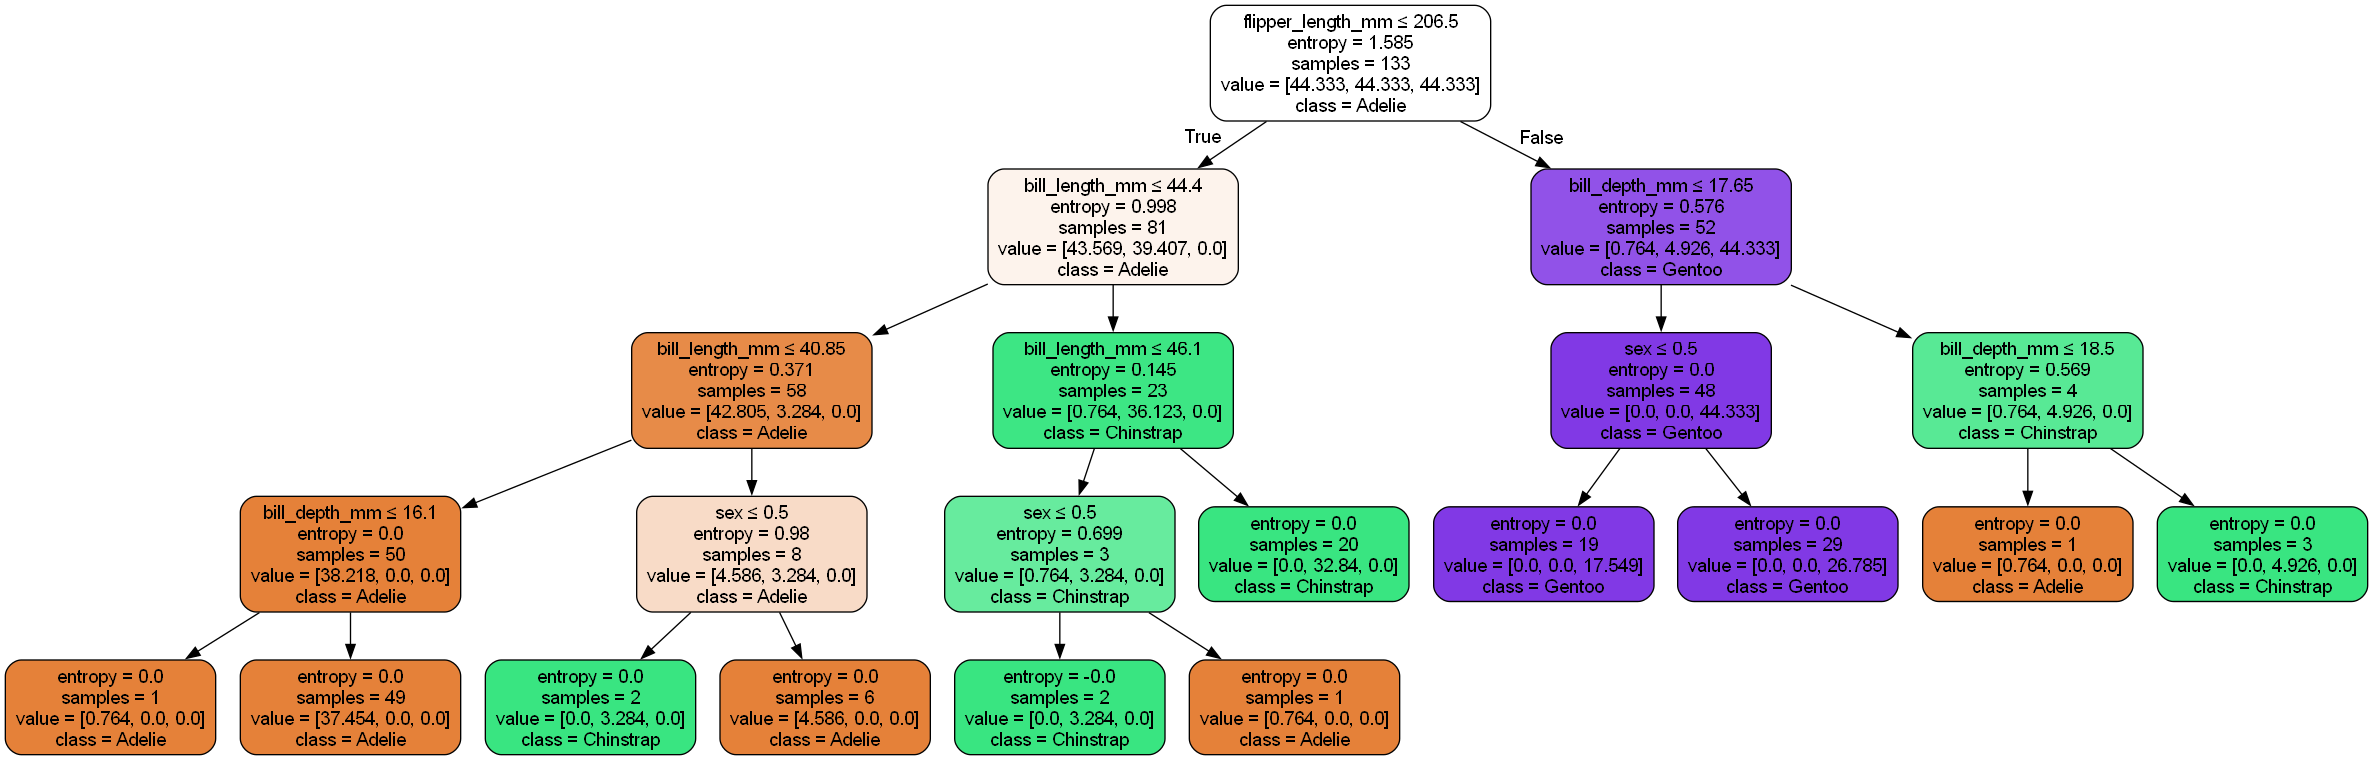

Decision tree of the model trained with split ratio 0.6/0.4



(process:13540): Pango-CRITICAL **: 02:02:40.799: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13540): Pango-CRITICAL **: 02:02:40.799: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13540): Pango-CRITICAL **: 02:02:40.799: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13540): Pango-CRITICAL **: 02:02:40.799: pango_font_description_get_family: assertion 'desc != NULL' failed


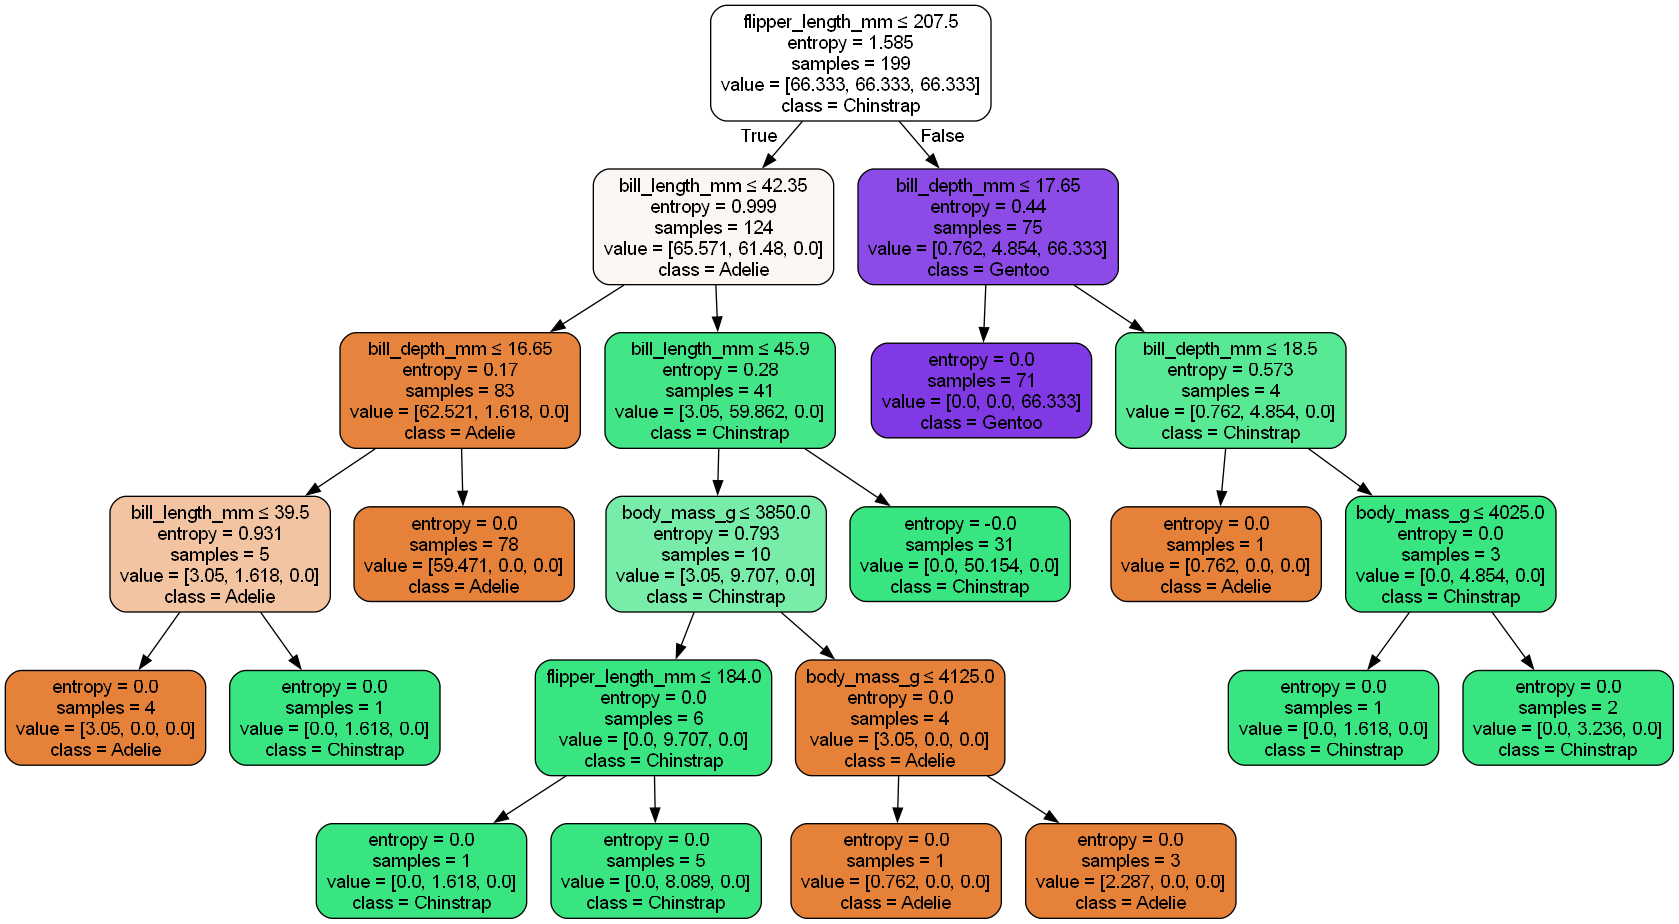

Decision tree of the model trained with split ratio 0.8/0.2



(process:10800): Pango-CRITICAL **: 02:02:41.743: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:10800): Pango-CRITICAL **: 02:02:41.744: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:10800): Pango-CRITICAL **: 02:02:41.744: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:10800): Pango-CRITICAL **: 02:02:41.744: pango_font_description_get_family: assertion 'desc != NULL' failed


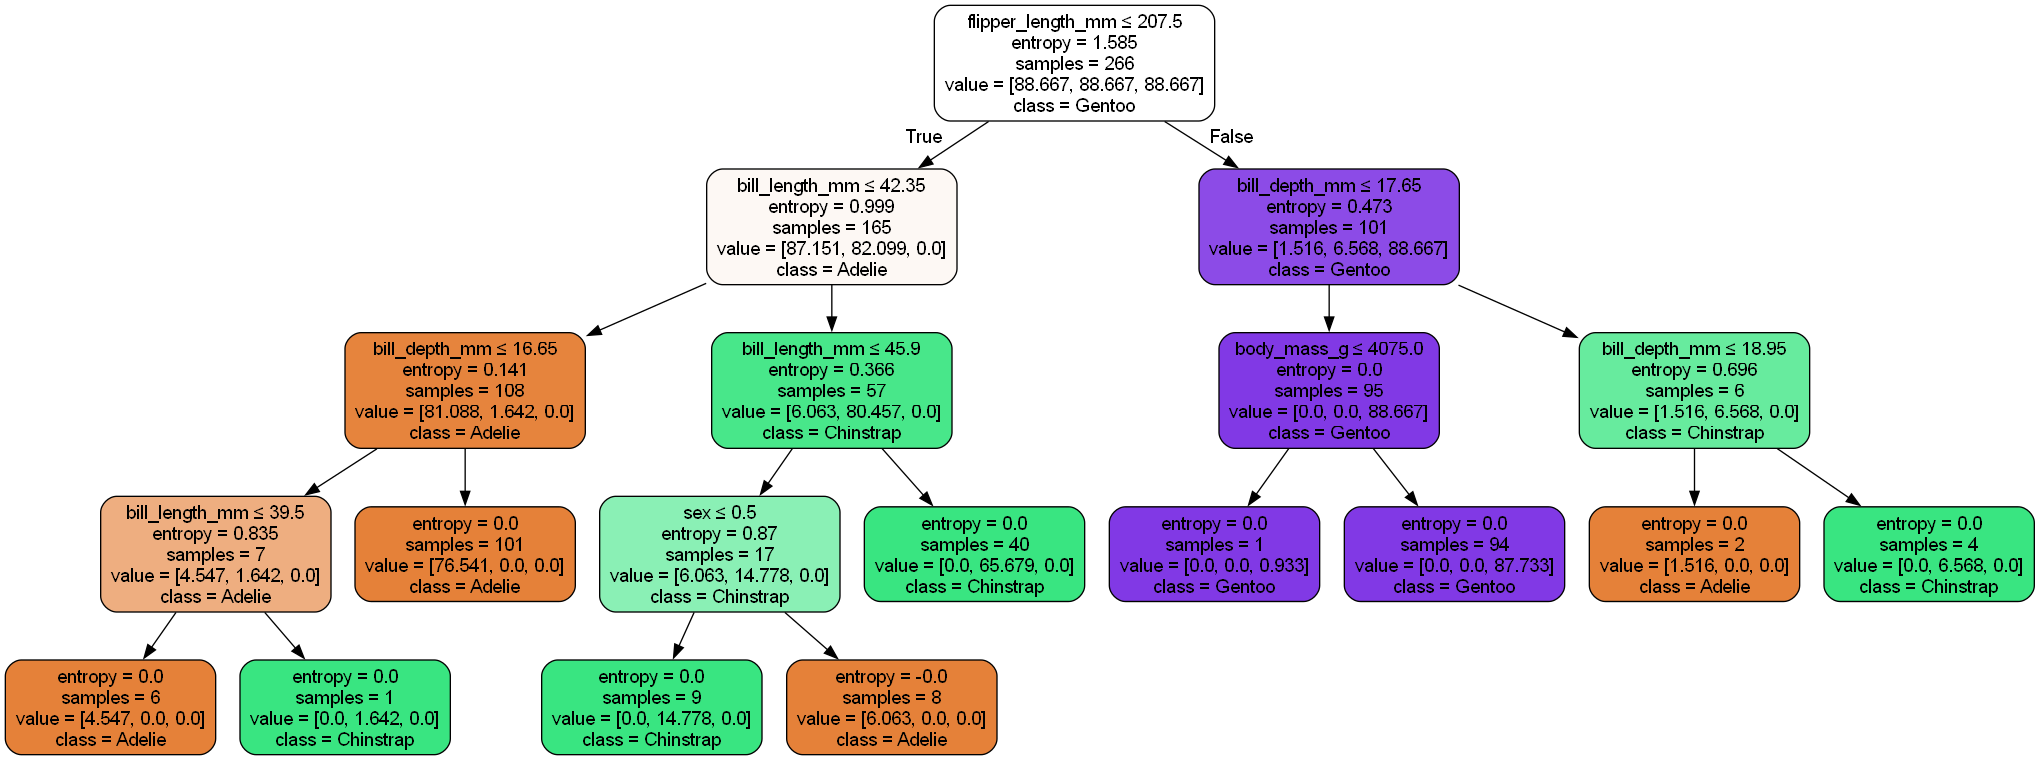

Decision tree of the model trained with split ratio 0.9/0.1



(process:4492): Pango-CRITICAL **: 02:02:42.703: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:4492): Pango-CRITICAL **: 02:02:42.703: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:4492): Pango-CRITICAL **: 02:02:42.703: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:4492): Pango-CRITICAL **: 02:02:42.703: pango_font_description_get_family: assertion 'desc != NULL' failed


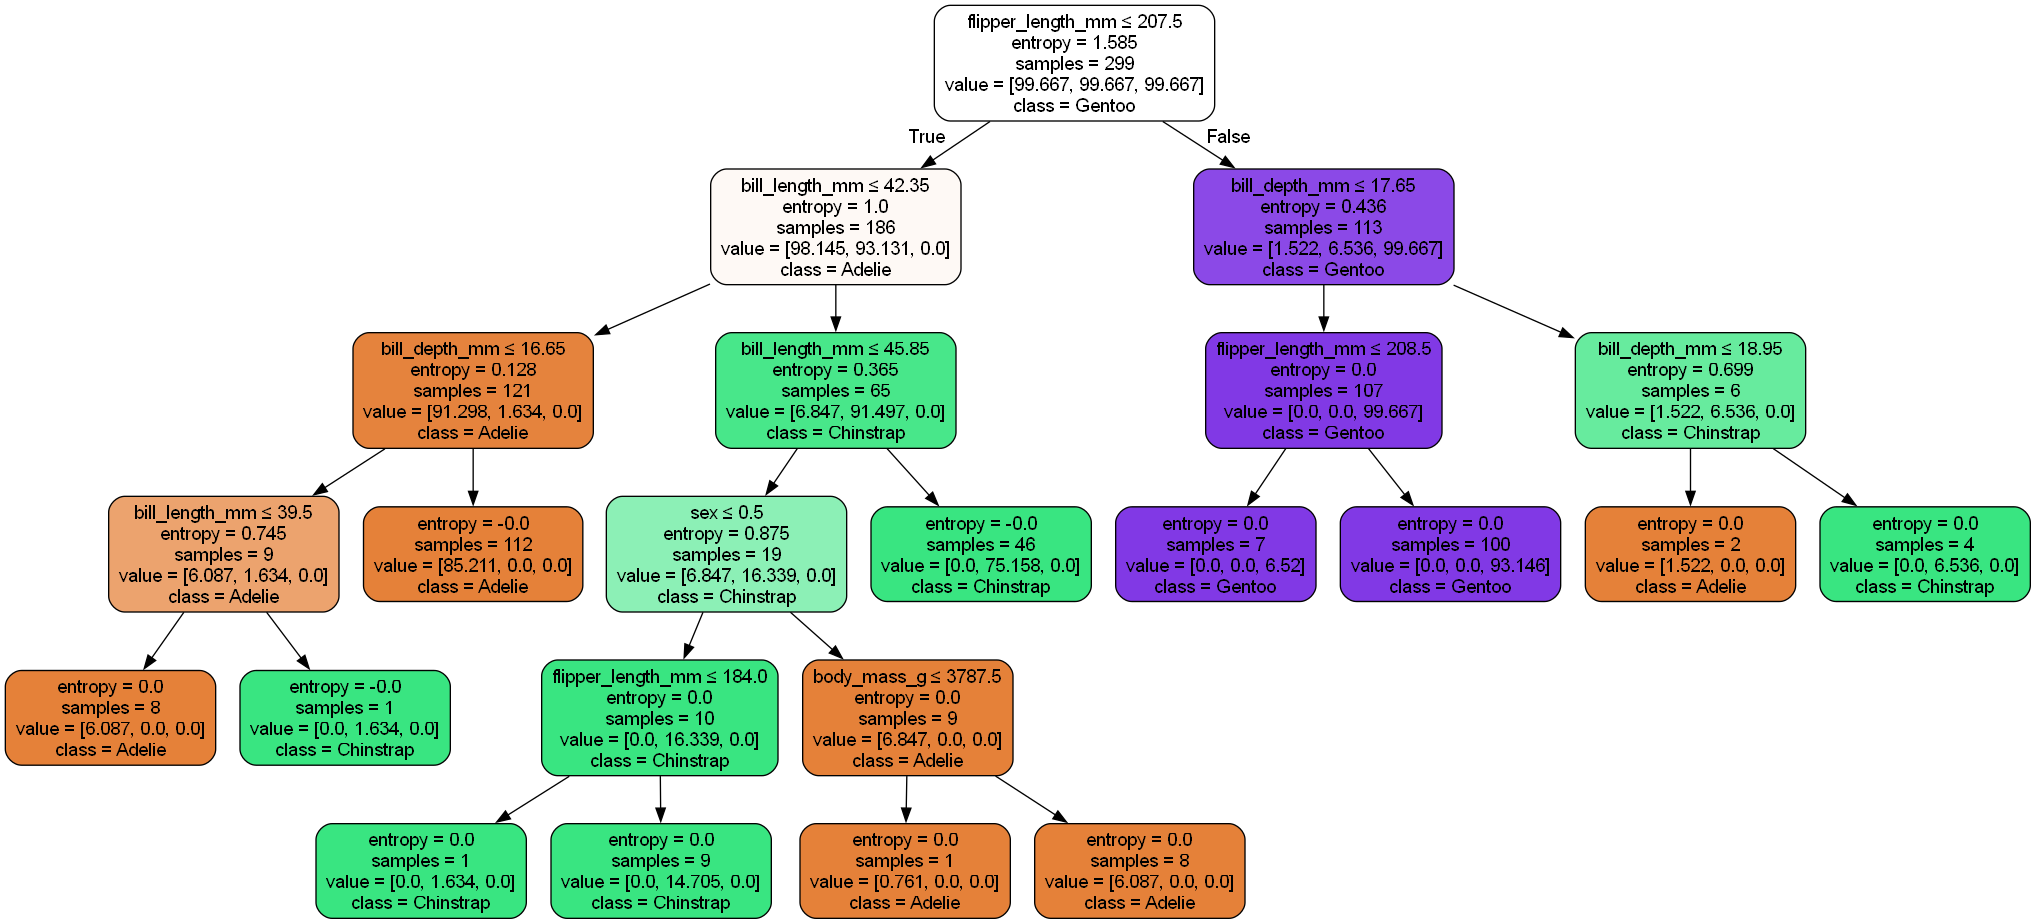

In [16]:
for i in range(len(models)):
    print(f"Decision tree of the model trained with split ratio {split_ratios[i][0]}/{split_ratios[i][1]}")
    # Export the decision tree to DOT format
    dot_data = export_graphviz(
        models[i],  # Use correct model from the list
        out_file=None,
        feature_names=feature_columns,  # Use defined feature columns
        class_names=class_names,  # Use meaningful class names
        filled=True,
        rounded=True,
        special_characters=True,
        fontname="Arial"  # Avoid Pango warnings
    )
    
    # Render the DOT file with Graphviz
    graph = Source(dot_data)
    # Visualize the tree
    graph.render(f"./tree/tree2/tree_{split_ratios[i][0]}_{split_ratios[i][1]}", 
                 format='png', 
                 cleanup=True)
    display(Image(filename=f"./tree/tree2/tree_{split_ratios[i][0]}_{split_ratios[i][1]}.png"))

### 5. Đánh giá Decision Tree

Split (0.4, 0.6) Class Distribution in Test Set:
Adelie       88
Chinstrap    41
Gentoo       71
Name: count, dtype: int64
Classification Report for 0.4/0.6 Split:
              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.98        88
   Chinstrap       0.89      1.00      0.94        41
      Gentoo       1.00      0.99      0.99        71

    accuracy                           0.97       200
   macro avg       0.96      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



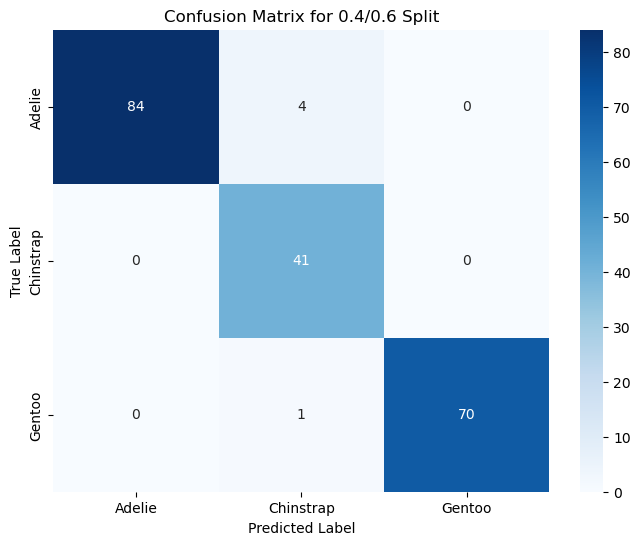

Split (0.6, 0.4) Class Distribution in Test Set:
Adelie       59
Chinstrap    27
Gentoo       48
Name: count, dtype: int64
Classification Report for 0.6/0.4 Split:
              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        59
   Chinstrap       0.87      0.96      0.91        27
      Gentoo       1.00      0.96      0.98        48

    accuracy                           0.96       134
   macro avg       0.94      0.96      0.95       134
weighted avg       0.96      0.96      0.96       134



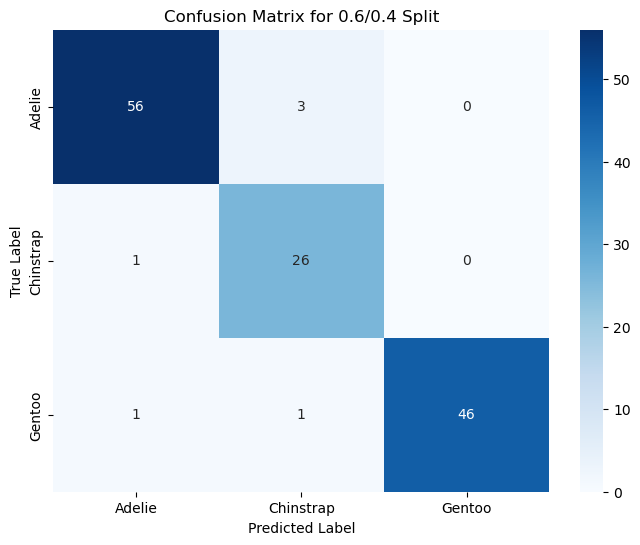

Split (0.8, 0.2) Class Distribution in Test Set:
Adelie       29
Chinstrap    14
Gentoo       24
Name: count, dtype: int64
Classification Report for 0.8/0.2 Split:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.96        67
   macro avg       0.94      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67



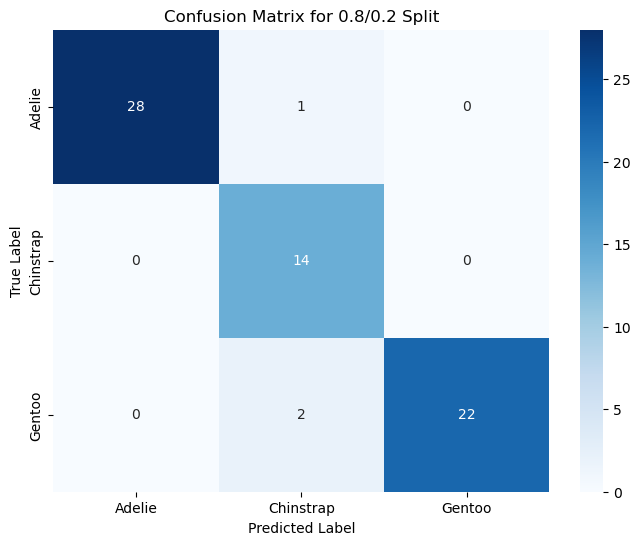

Split (0.9, 0.1) Class Distribution in Test Set:
Adelie       15
Chinstrap     7
Gentoo       12
Name: count, dtype: int64
Classification Report for 0.9/0.1 Split:
              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        15
   Chinstrap       0.70      1.00      0.82         7
      Gentoo       1.00      0.83      0.91        12

    accuracy                           0.91        34
   macro avg       0.90      0.92      0.90        34
weighted avg       0.94      0.91      0.92        34



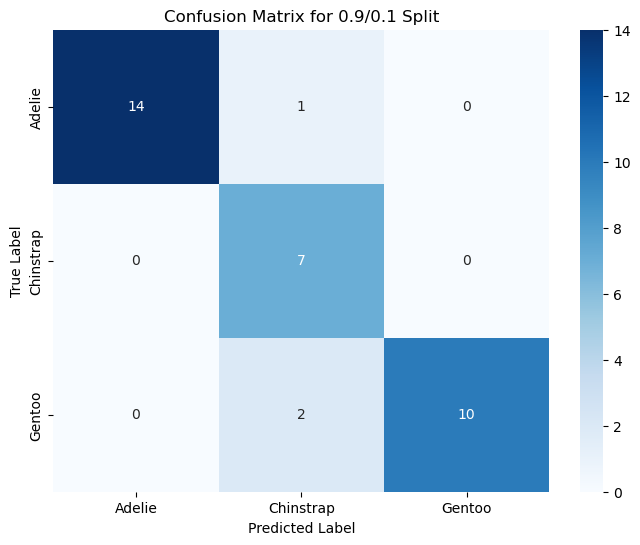

In [17]:
# For each model and split, make predictions, generate a report, and confusion matrix
for i, subset in enumerate(subsets):
    feature_train = subset['feature_train']
    label_train = subset['label_train']
    feature_test = subset['feature_test']
    label_test = subset['label_test']
    
    # Make predictions
    label_pred = models[i].predict(feature_test)
    
    # Print class distribution in test set
    print(f"Split {split_ratios[i]} Class Distribution in Test Set:")
    print(pd.Series(label_test).value_counts().sort_index().rename(index=dict(enumerate(class_names))))
    
    # Generate classification report
    print(f"Classification Report for {split_ratios[i][0]}/{split_ratios[i][1]} Split:")
    print(classification_report(label_test, label_pred, target_names=class_names, zero_division=0))
    
    # Generate confusion matrix
    cm = confusion_matrix(label_test, label_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix for {split_ratios[i][0]}/{split_ratios[i][1]} Split")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

### 6. Độ sâu (depth) và độ chính xác (accuracy) của Decision Tree

#### 6.1 Visualization

Decision tree of the model trained with split ratio 80/20 and max depth None



(process:25168): Pango-CRITICAL **: 02:07:23.373: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:25168): Pango-CRITICAL **: 02:07:23.374: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:25168): Pango-CRITICAL **: 02:07:23.374: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:25168): Pango-CRITICAL **: 02:07:23.374: pango_font_description_get_family: assertion 'desc != NULL' failed


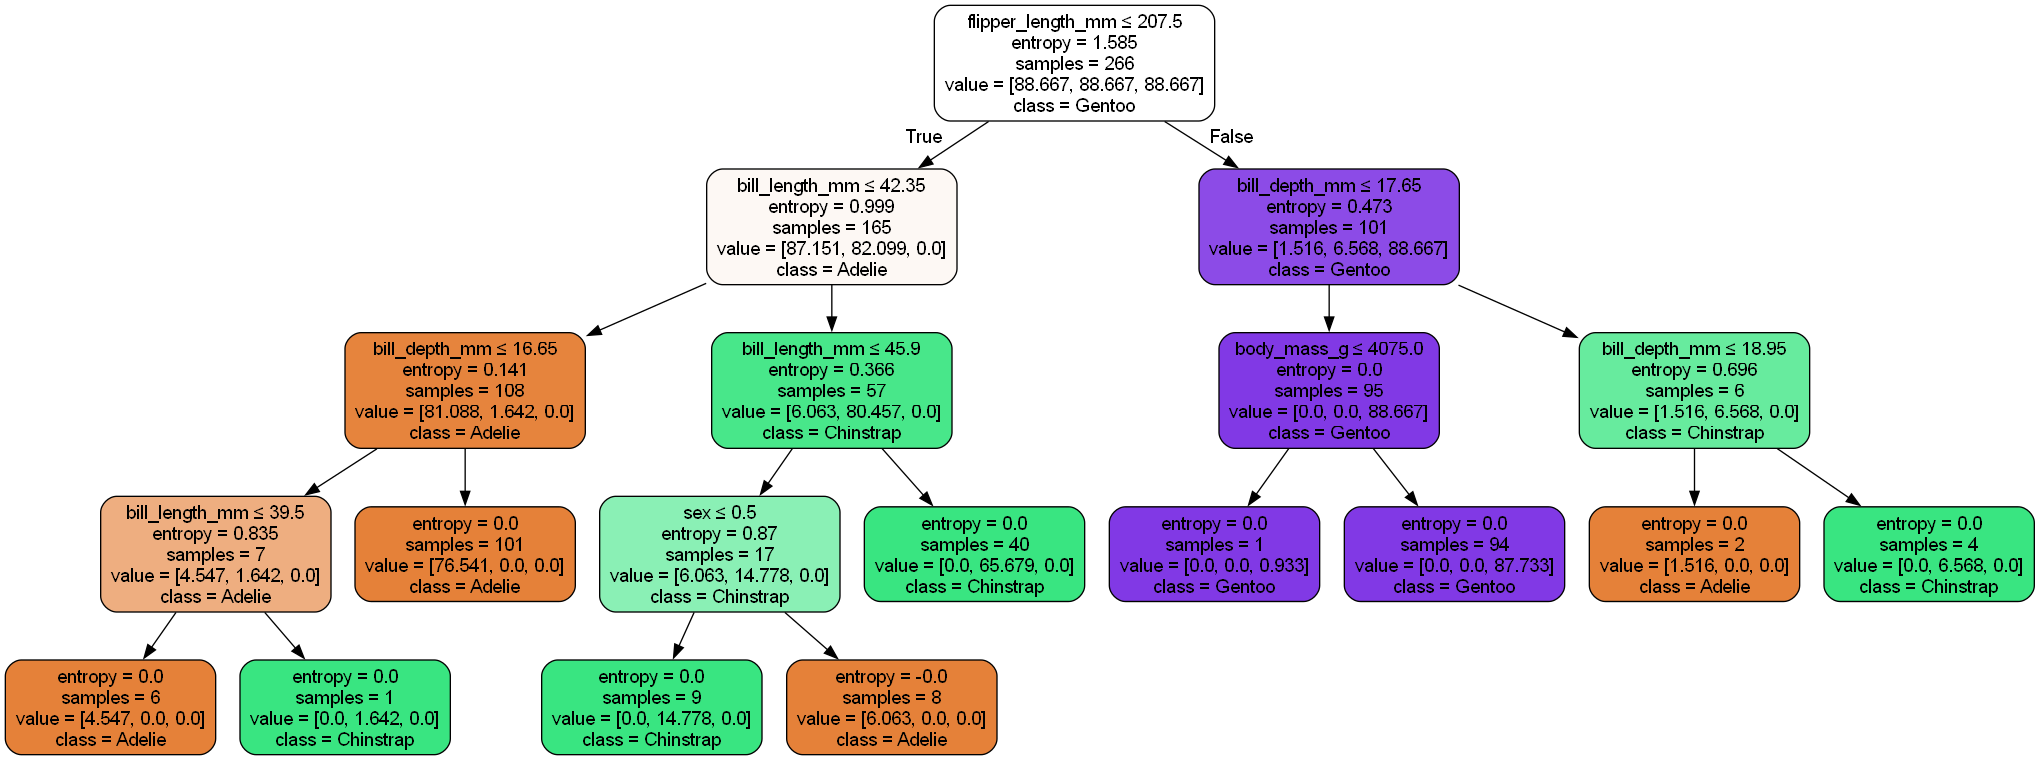

Accuracy for max_depth None: 0.9552
Decision tree of the model trained with split ratio 80/20 and max depth 2



(process:5480): Pango-CRITICAL **: 02:07:24.377: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5480): Pango-CRITICAL **: 02:07:24.384: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5480): Pango-CRITICAL **: 02:07:24.384: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5480): Pango-CRITICAL **: 02:07:24.384: pango_font_description_get_family: assertion 'desc != NULL' failed


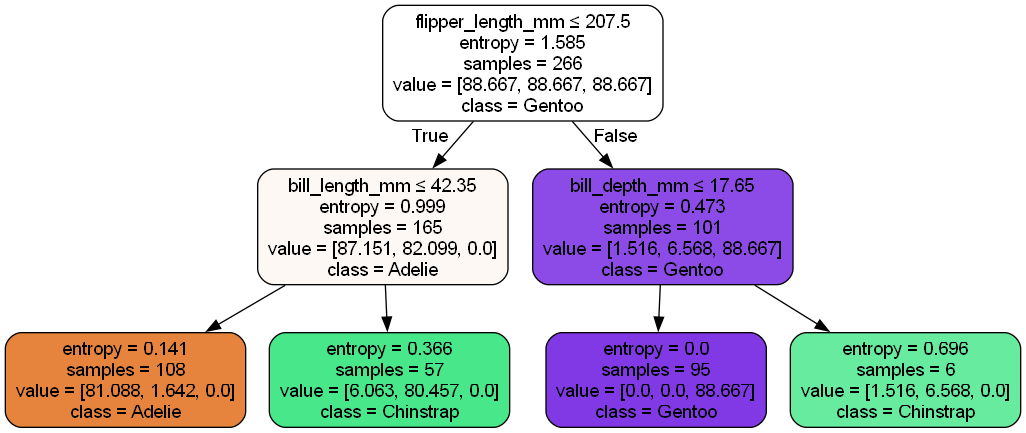

Accuracy for max_depth 2: 0.9254
Decision tree of the model trained with split ratio 80/20 and max depth 3



(process:24256): Pango-CRITICAL **: 02:07:25.160: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:24256): Pango-CRITICAL **: 02:07:25.160: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:24256): Pango-CRITICAL **: 02:07:25.160: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:24256): Pango-CRITICAL **: 02:07:25.160: pango_font_description_get_family: assertion 'desc != NULL' failed


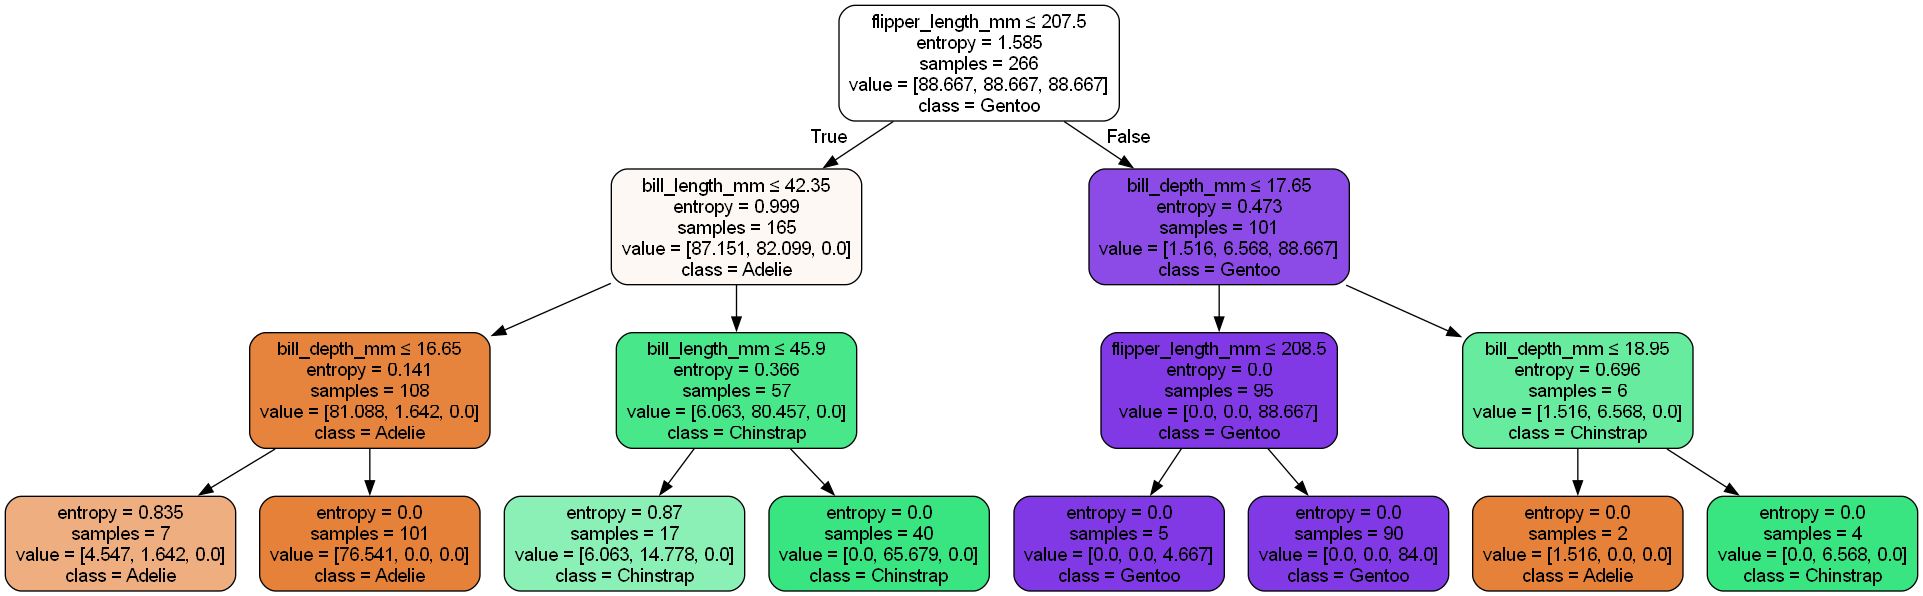

Accuracy for max_depth 3: 0.9254
Decision tree of the model trained with split ratio 80/20 and max depth 4



(process:23688): Pango-CRITICAL **: 02:07:26.111: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23688): Pango-CRITICAL **: 02:07:26.111: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23688): Pango-CRITICAL **: 02:07:26.111: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:23688): Pango-CRITICAL **: 02:07:26.111: pango_font_description_get_family: assertion 'desc != NULL' failed


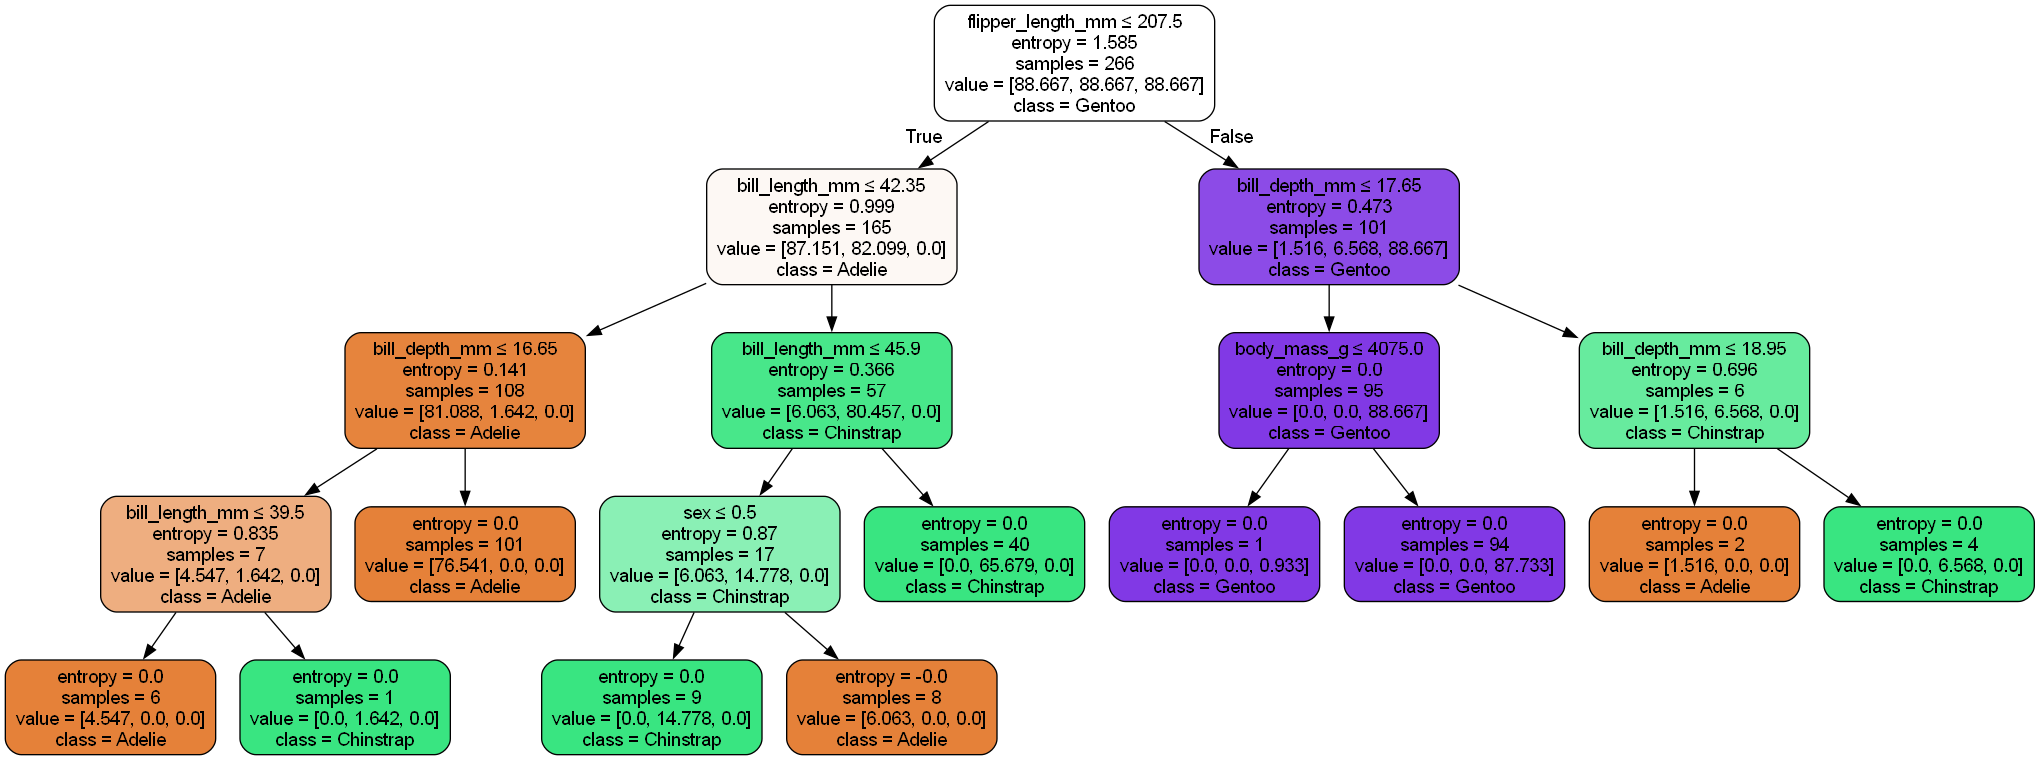

Accuracy for max_depth 4: 0.9552
Decision tree of the model trained with split ratio 80/20 and max depth 5



(process:1244): Pango-CRITICAL **: 02:07:26.999: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:1244): Pango-CRITICAL **: 02:07:26.999: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:1244): Pango-CRITICAL **: 02:07:26.999: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:1244): Pango-CRITICAL **: 02:07:26.999: pango_font_description_get_family: assertion 'desc != NULL' failed


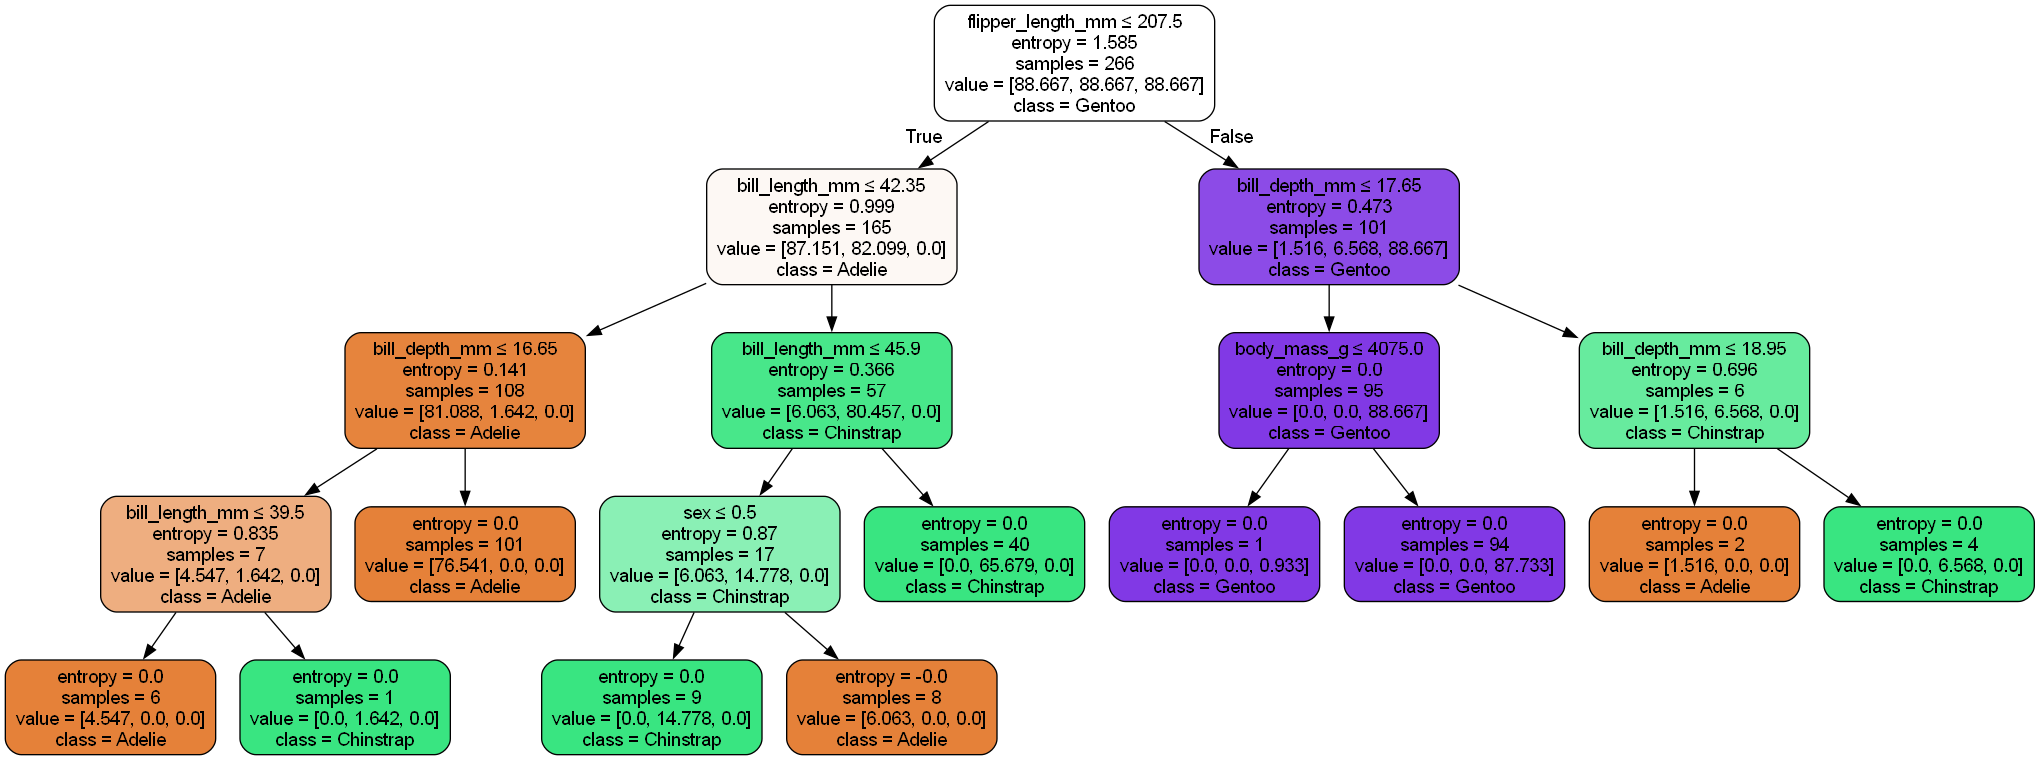

Accuracy for max_depth 5: 0.9552
Decision tree of the model trained with split ratio 80/20 and max depth 6



(process:26084): Pango-CRITICAL **: 02:07:27.873: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:26084): Pango-CRITICAL **: 02:07:27.873: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:26084): Pango-CRITICAL **: 02:07:27.873: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:26084): Pango-CRITICAL **: 02:07:27.873: pango_font_description_get_family: assertion 'desc != NULL' failed


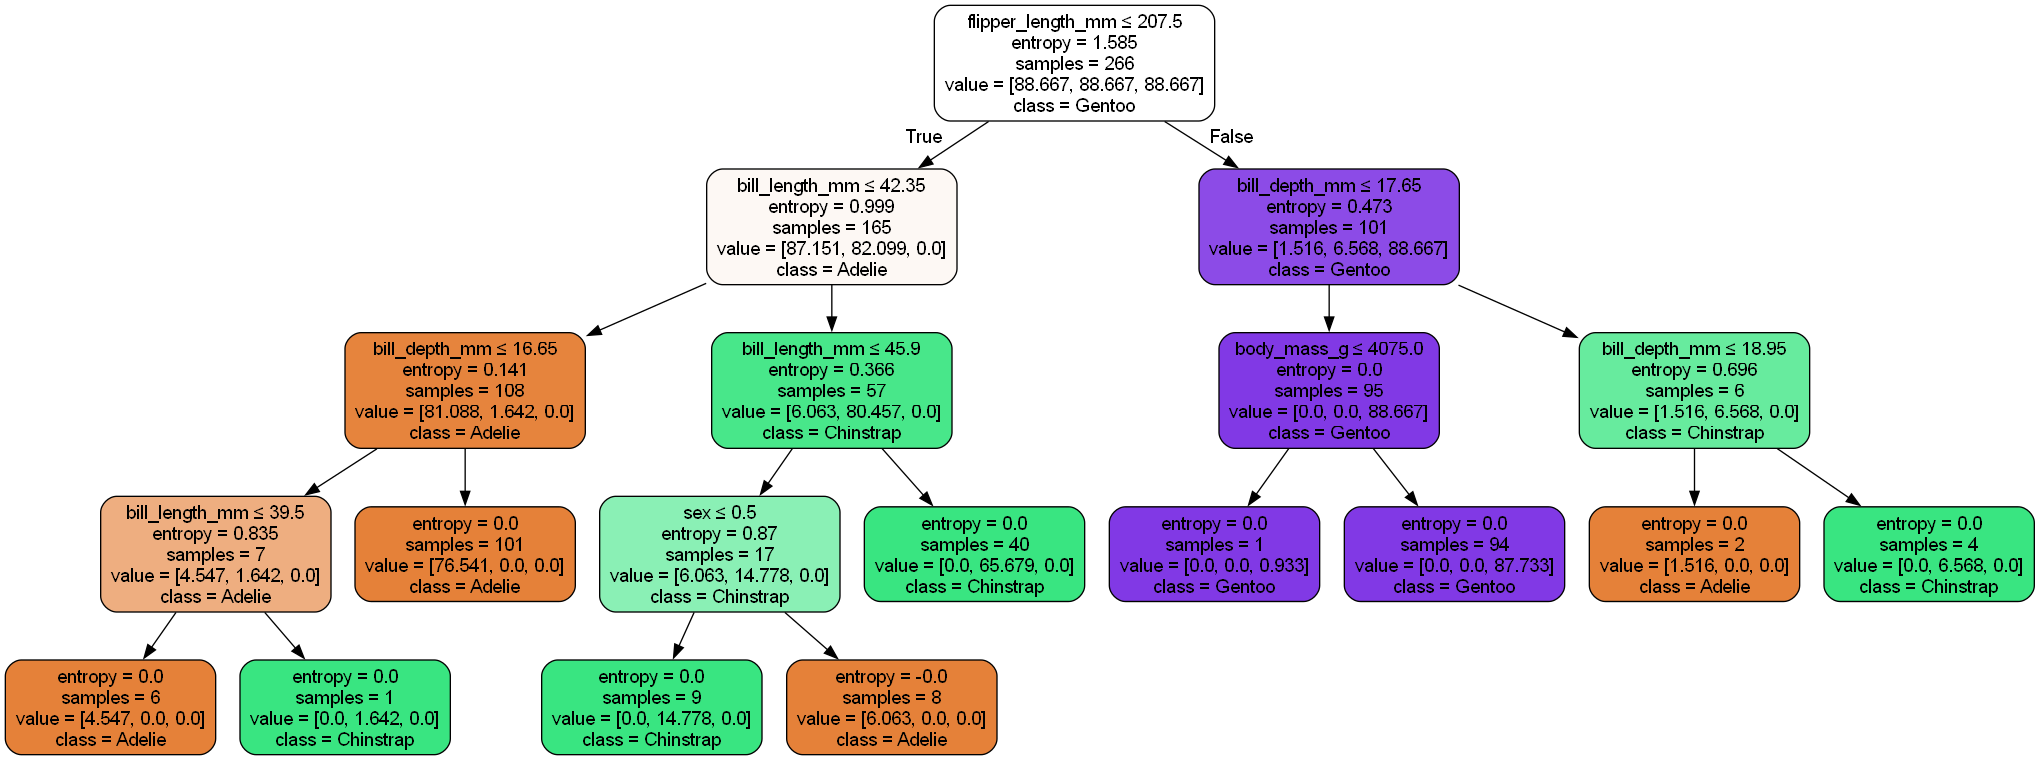

Accuracy for max_depth 6: 0.9552
Decision tree of the model trained with split ratio 80/20 and max depth 7



(process:26360): Pango-CRITICAL **: 02:07:28.775: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:26360): Pango-CRITICAL **: 02:07:28.775: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:26360): Pango-CRITICAL **: 02:07:28.775: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:26360): Pango-CRITICAL **: 02:07:28.775: pango_font_description_get_family: assertion 'desc != NULL' failed


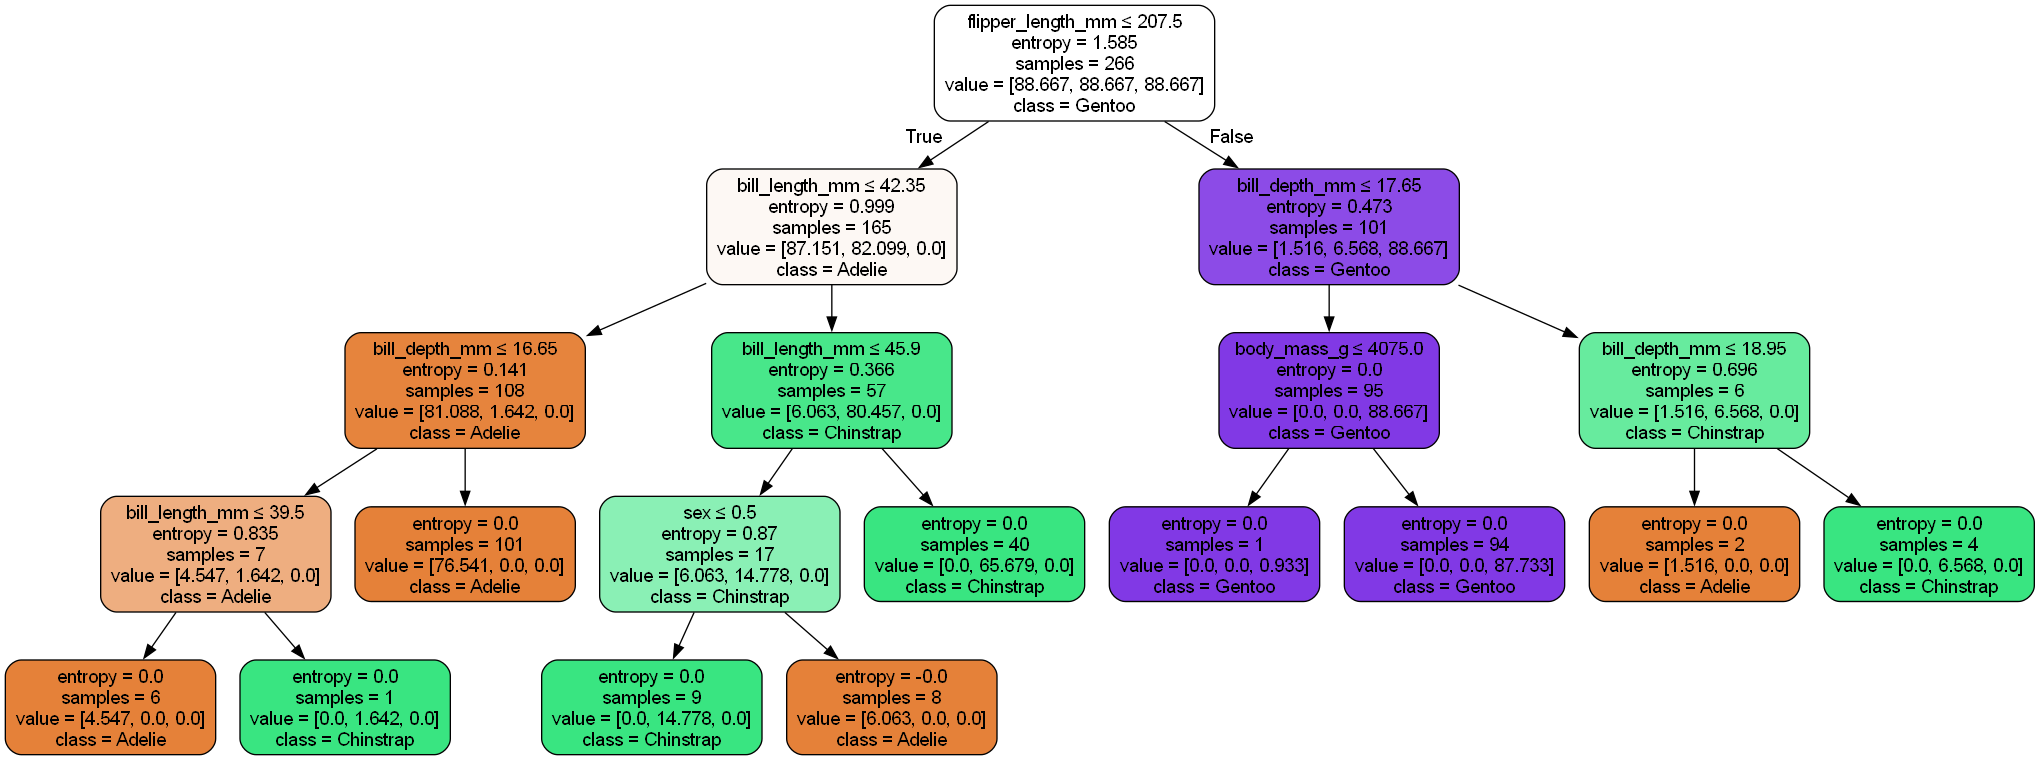

Accuracy for max_depth 7: 0.9552


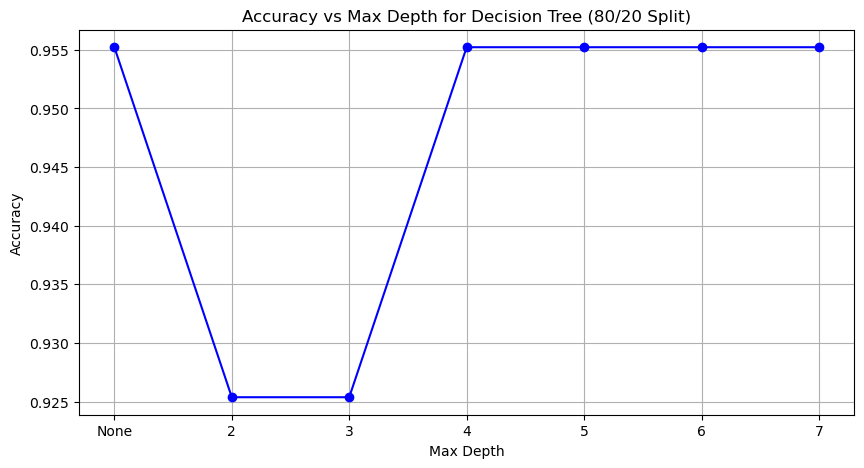

In [19]:
from sklearn.metrics import accuracy_score

# Select the 80/20 split (index 2 in split_ratios)
subset_80_20 = subsets[2]
feature_train_80_20 = subset_80_20['feature_train']
label_train_80_20 = subset_80_20['label_train']
feature_test_80_20 = subset_80_20['feature_test']
label_test_80_20 = subset_80_20['label_test']

accuracy_scores = []
depths = [None, 2, 3, 4, 5, 6, 7]

for depth in depths:
    model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth, class_weight='balanced')
    model.fit(feature_train_80_20, label_train_80_20)

    print(f"Decision tree of the model trained with split ratio 80/20 and max depth {depth}")
    # Export the decision tree to DOT format
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=feature_columns,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True,
        fontname="Arial"
    )
    
    # Render the DOT file with Graphviz
    graph = Source(dot_data)
    # Visualize the tree
    graph.render(f"./tree_80_20/tree2/tree_{depth}", 
                 format='png', 
                 cleanup=True)
    display(Image(filename=f"./tree_80_20/tree2/tree_{depth}.png"))

    # Make predictions and calculate accuracy
    pred = model.predict(feature_test_80_20)
    accuracy = accuracy_score(label_test_80_20, pred)
    print(f"Accuracy for max_depth {depth}: {accuracy:.4f}")
    accuracy_scores.append(accuracy)

# Plot the results
depths_for_plot = [str(d) if d is not None else 'None' for d in depths]
plt.figure(figsize=(10, 5))
plt.plot(depths_for_plot, accuracy_scores, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs Max Depth for Decision Tree (80/20 Split)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths_for_plot)
plt.grid(True)
plt.show()